In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

In [2]:
df = pd.read_csv("F:\\python\Data_Visualization_with_Python_s2-main\HW-2\\skoda.csv")
display(df.head(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5


In [3]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,12.037576,0.394800
min,2004.000000,995.000000,5.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,201.800000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   mpg           6267 non-null   float64
 7   engineSize    6267 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


# A pie chart with transmission variable-

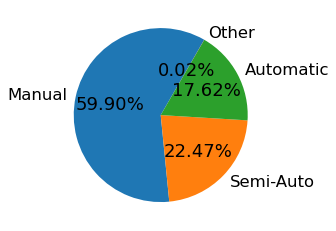

In [5]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       startangle=60)
plt.ylabel("")
plt.show()
shadow= True

A pie chart with fueltype variable-

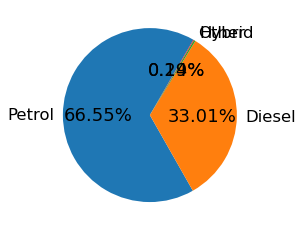

In [7]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       startangle=60)
plt.ylabel("")
plt.show()
shadow= True

Here we can see the pie chart is not understable and overlaps different percentages.So i have created another barplot with the same variable to understand that well.

1) Creating percentages-

In [8]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,4171,66.55
1,Diesel,2069,33.01
2,Hybrid,18,0.29
3,Other,9,0.14


# 2)barplot

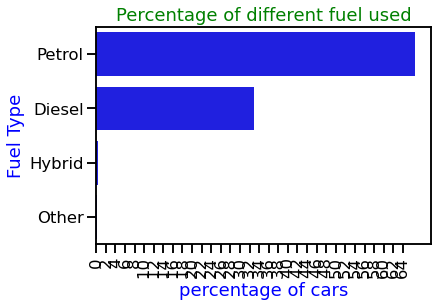

In [9]:
sns.barplot(x="% of cars" , 
            y="fuelType", 
            data=df_fuelType, 
            color="blue",
            alpha=1.0)
plt.xlabel("percentage of cars",color="blue")
plt.ylabel("Fuel Type",color="blue")
plt.title("Percentage of different fuel used",color="Green")

plt.xticks(np.arange(0,66,2),rotation="vertical" )
plt.show()

# Boxplot with numerical columns

<AxesSubplot:ylabel='price'>

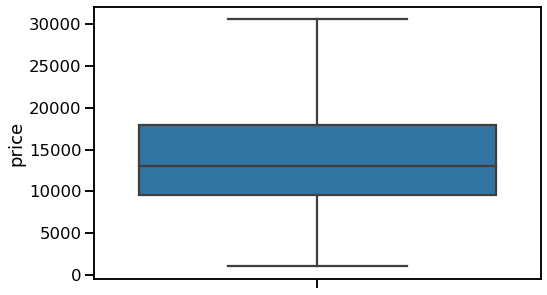

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(y = "price", data=df, showfliers=False)

In [6]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
print(num_cols)


['year', 'price', 'mileage', 'mpg', 'engineSize']


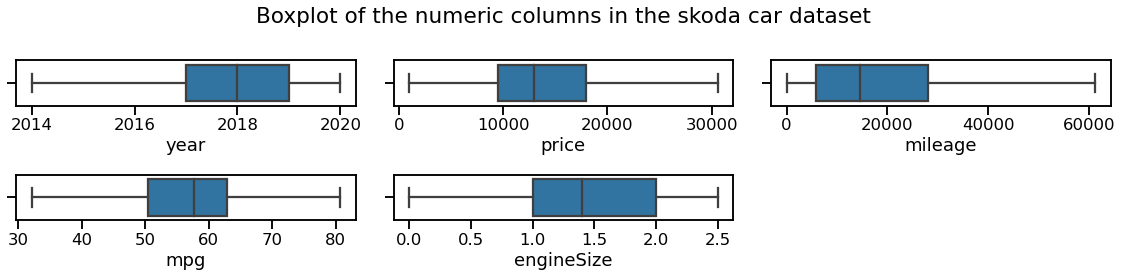

In [7]:
plt.figure(figsize=(16,4))

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the skoda car dataset")
plt.tight_layout()
plt.show()


# Categorical boxplot

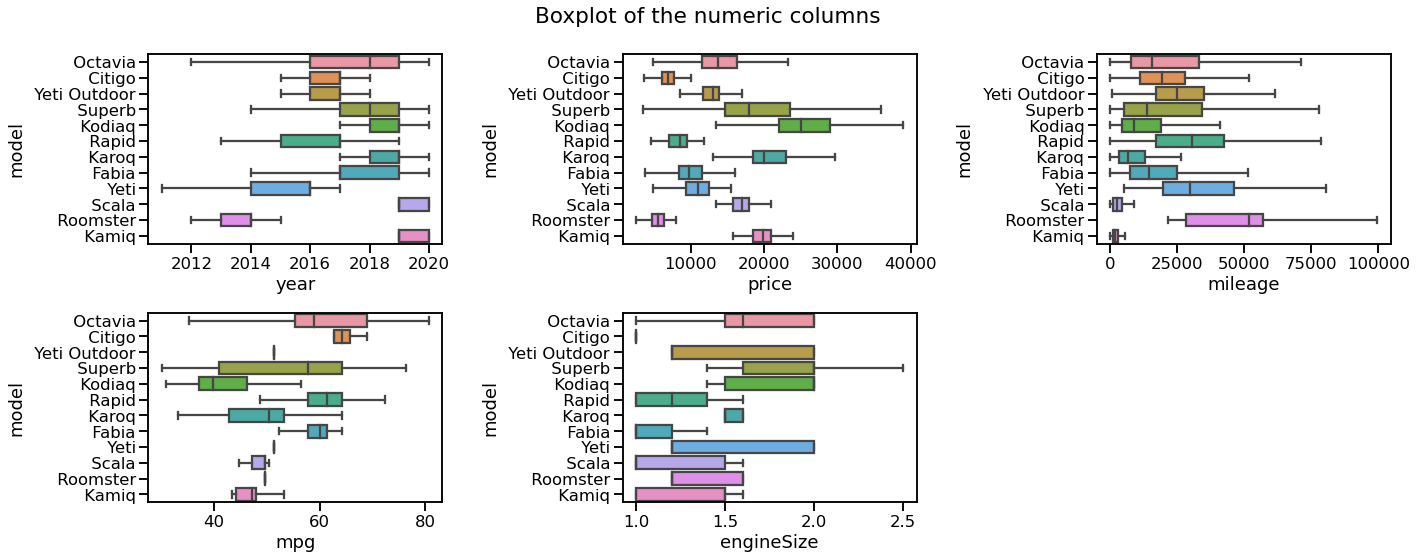

In [8]:
plt.figure(figsize=(20,8)) 

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False, y=df["model"])

plt.suptitle("Boxplot of the numeric columns")
plt.tight_layout()
plt.show()

# Violinplot

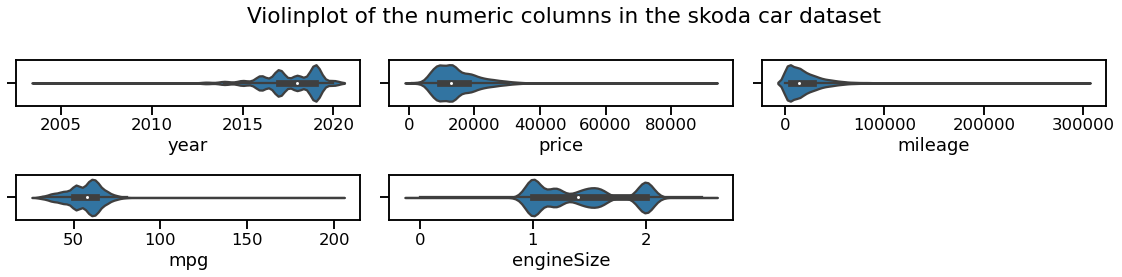

In [25]:
plt.figure(figsize=(16,4))

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Violinplot of the numeric columns in the skoda car dataset")
plt.tight_layout()
plt.show()

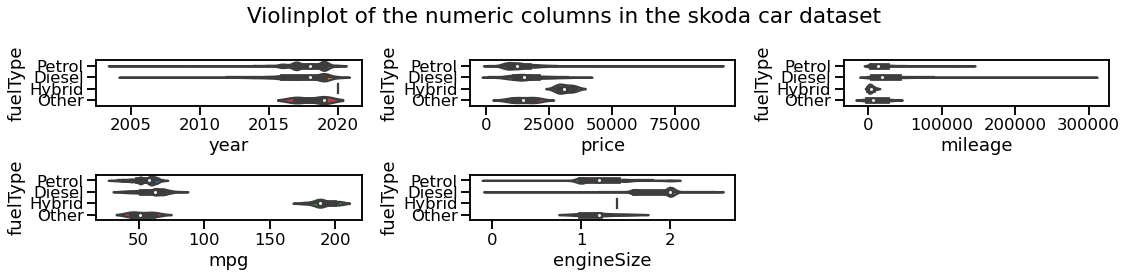

In [13]:

plt.figure(figsize=(16,4))

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False, y=df["fuelType"], split=True)

plt.suptitle("Violinplot of the numeric columns in the skoda car dataset")
plt.tight_layout()
plt.show()

# Comparison:
    from the above figures we can see boxplot is more convenient than violinplot for the skoda car analysis dataset.

# Histogram

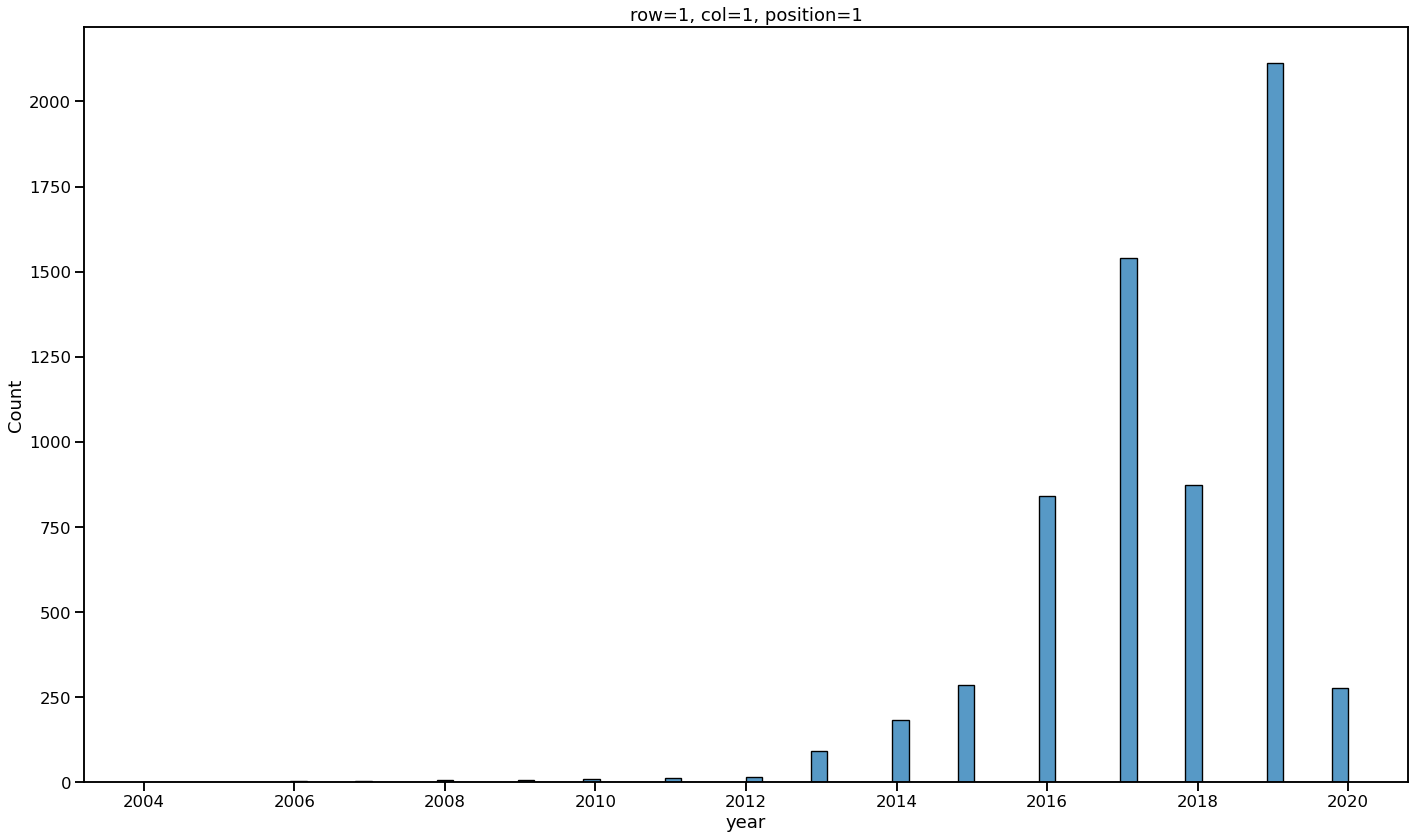

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(1,1,1)
sns.histplot(x="year", data=df)
plt.title("row=1, col=1, position=1")



plt.tight_layout()
plt.show()

# Scatterplot with numerical column:
1)mileage vs price 2)mpg vs price 3)engineSize vs price


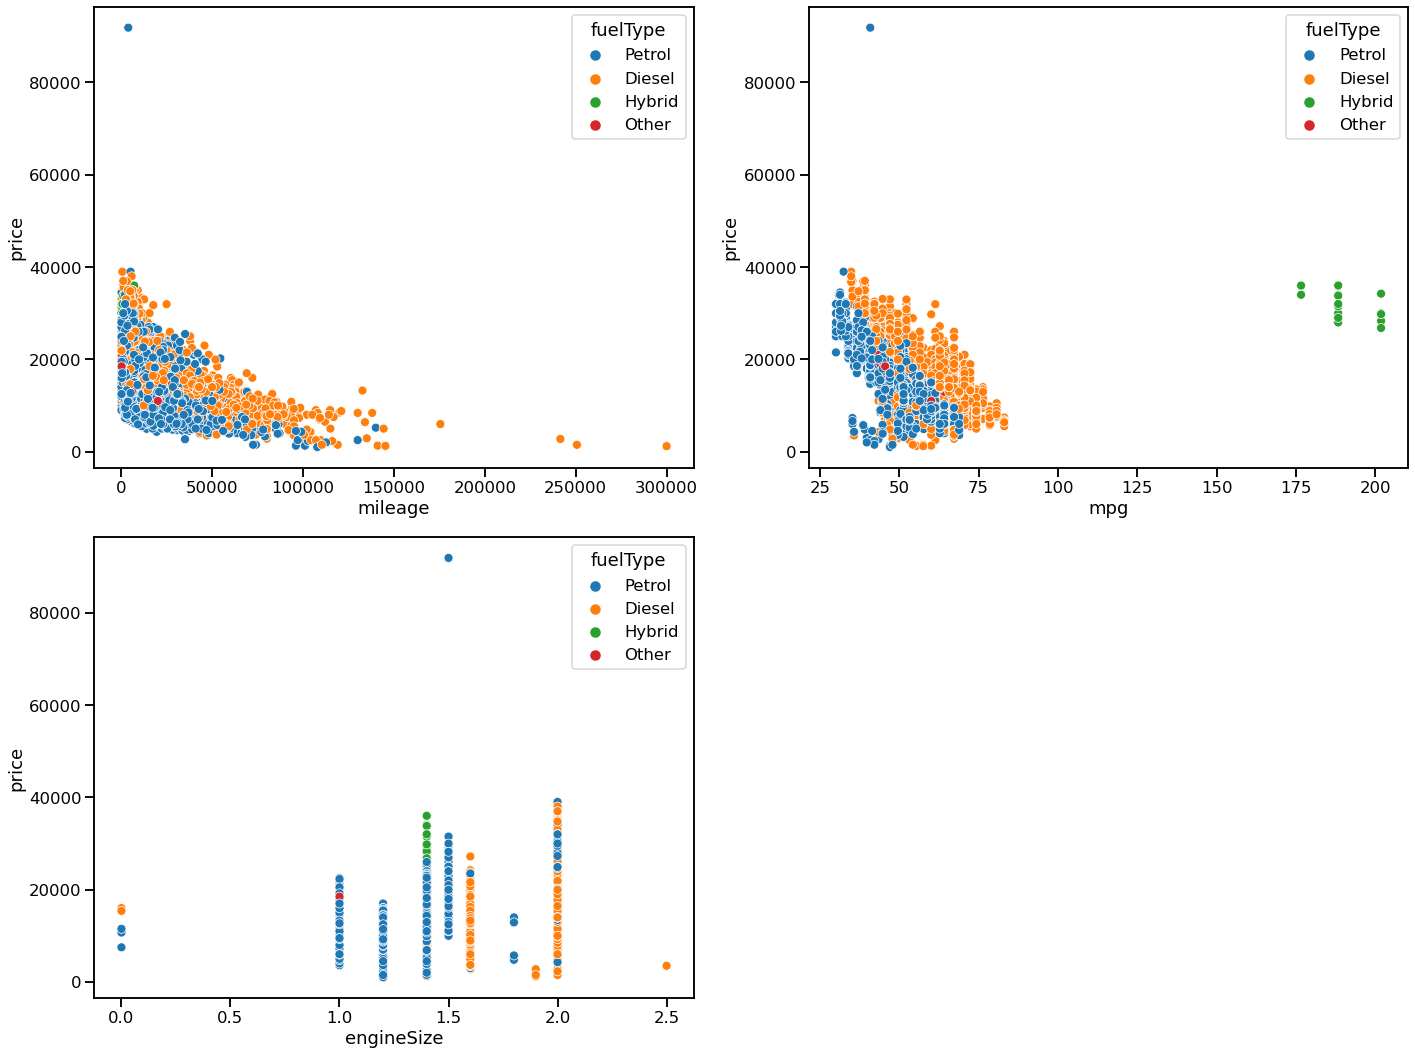

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df,hue="fuelType")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df,hue="fuelType")

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df,hue="fuelType")

plt.tight_layout()
plt.show()

# Pairplot with numerical columns:
Non-categorical

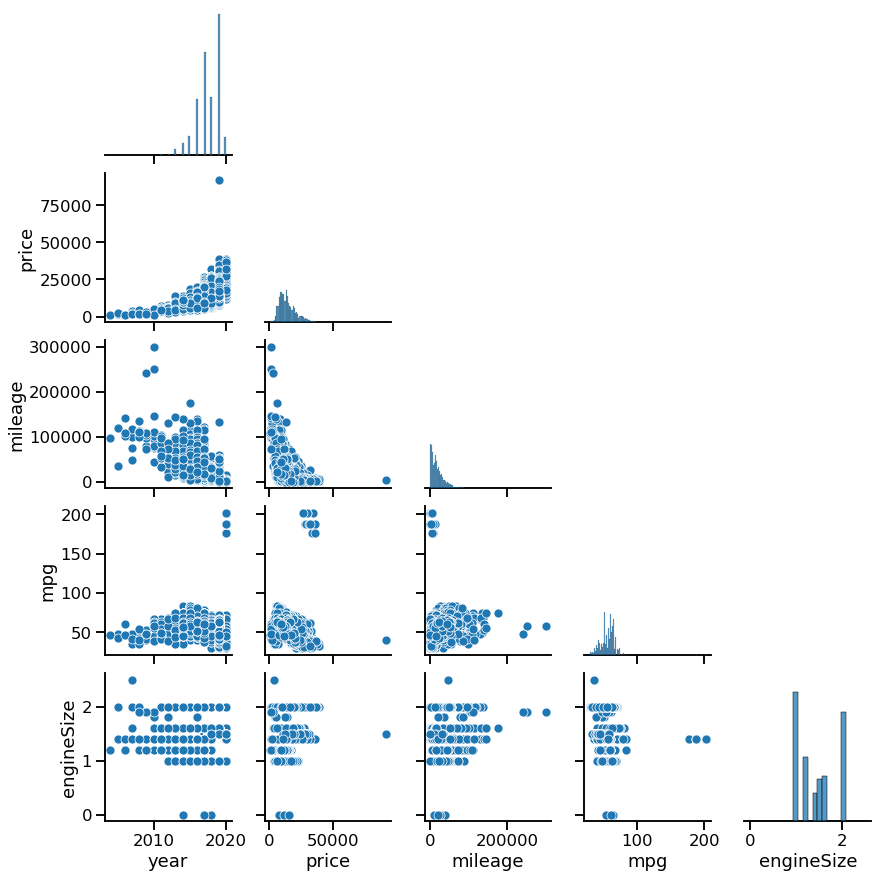

In [11]:
sns.pairplot(df, corner=True)
plt.show()

Categorical:

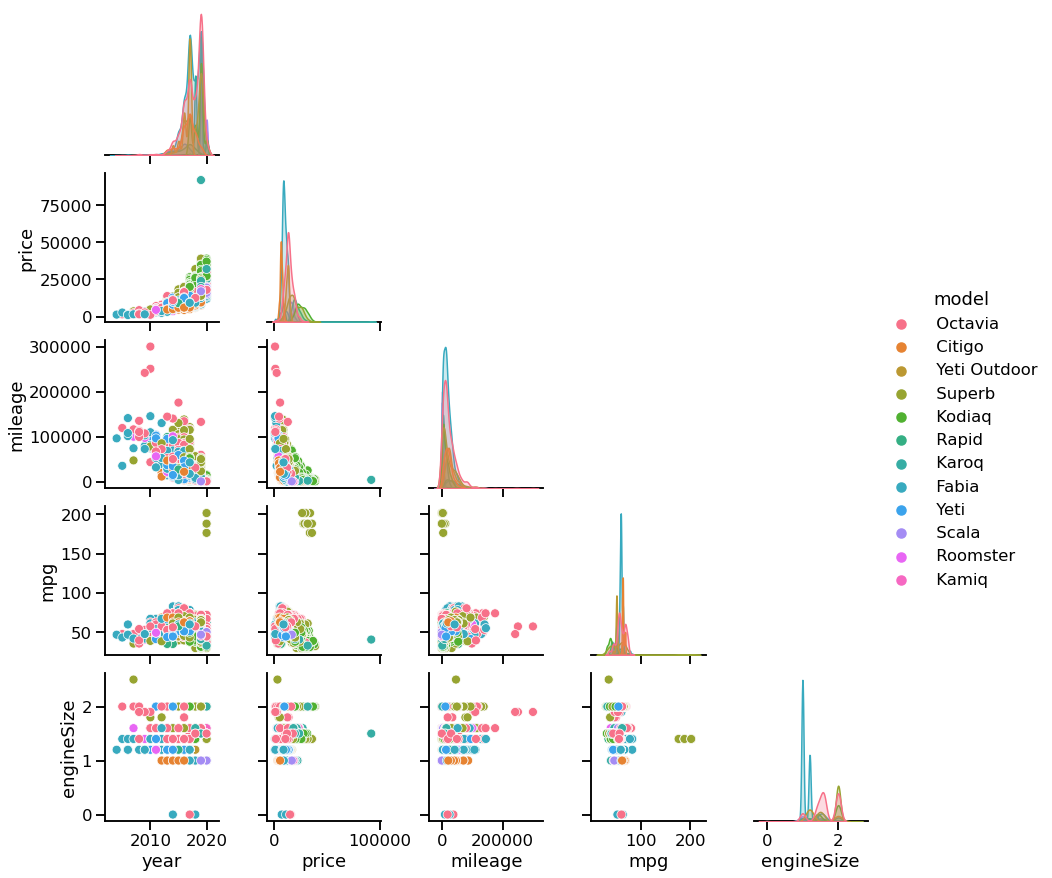

In [12]:
sns.pairplot(df,hue="model", corner=True)
plt.show()